# Mnist Dataset

### About dataset 
The mnist_train.csv file contains the **60,000** training examples and labels. 
<br>
The mnist_test.csv contains **10,000** test examples and labels. 
<br>
Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from scipy import stats
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
train_data = pd.read_csv(r"C:\Users\Afnan\Downloads\mnist_train.csv")
test_data = pd.read_csv(r"C:\Users\Afnan\Downloads\mnist_test.csv")

# Data Preprocessing

In [3]:
train_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [4]:
test_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train = train_data.iloc[:, 1:].values
y_train = train_data['label']
X_test = test_data.iloc[:, 1:].values
y_test = test_data['label']

In [6]:
X_train.shape

(60000, 784)

In [7]:
y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 784)

In [9]:
y_test.shape

(10000,)

### *Display a subset of data*

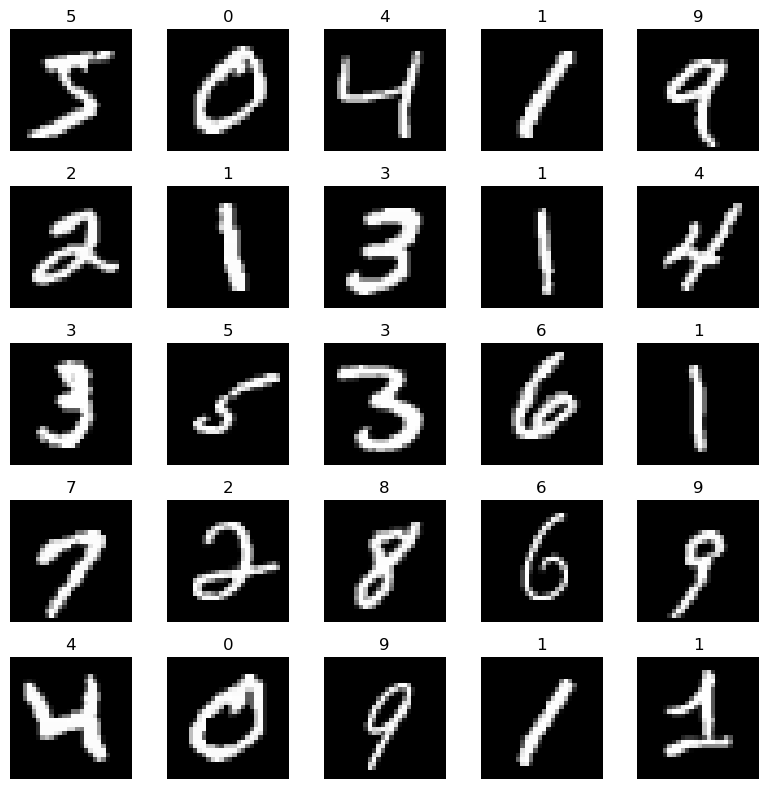

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="gray")
    ax.set_title(str(int(y_train[i])))
    ax.axis("off")

plt.tight_layout()
plt.show()

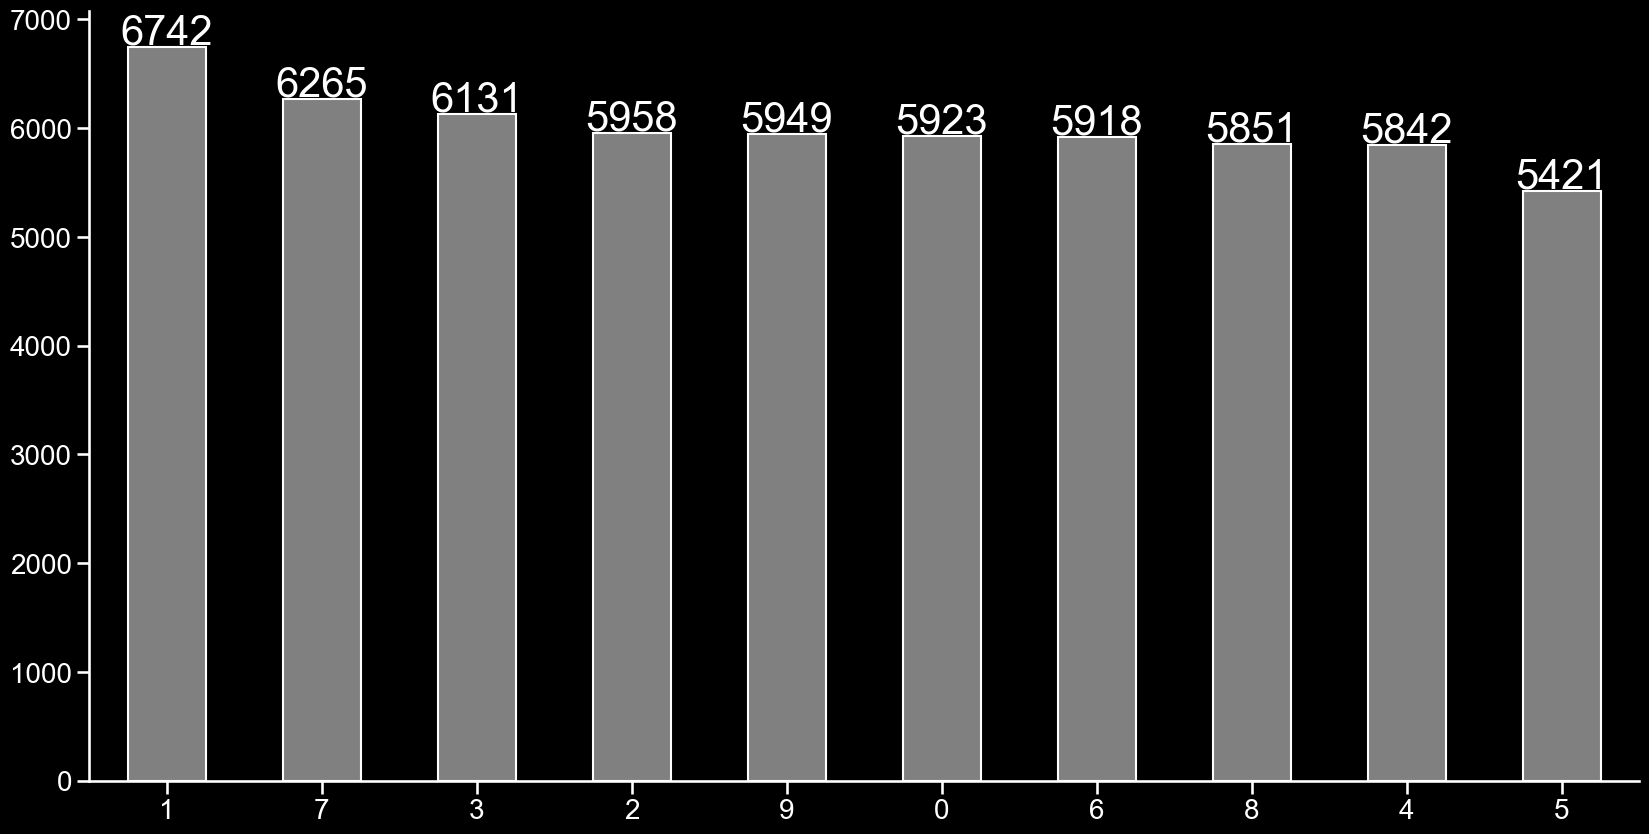

In [11]:
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
plt.figure(figsize = (20,10))
ax = y_train.value_counts().sort_values(ascending=False).plot(kind='bar',grid = False,fontsize=20,color='grey')
plt.xticks(rotation=0)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 30, height, ha = 'center', size = 30)
sns.despine()

> **Observation:**
<br>
<br>
**Class 1** has the most frequent 
<br>
**Class 2** has the least frequent 

### *Check null values*

In [12]:
train_data.isnull().sum().sum()

0

In [13]:
test_data.isnull().sum().sum()

0

> **Observation:**
<br>
Train and test data don't have null values

### *Check duplicates*

In [14]:
train_data[train_data.duplicated()]

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28


> **Observation:**
<br>
<br>
Train data doesn't have duplicate values

### *Standraization for train and test of x*

In [15]:
# Calculate the z-scores of the pixel values
z_scores_x = np.abs((X_train - np.mean(X_train)) / np.std(X_train))
z_scores_test = np.abs((X_test - np.mean(X_test)) / np.std(X_test))

### *Handel outliers*

In [16]:
# Remove any pixel values that have a z-score greater than 3
X_train = X_train[((z_scores_x < 3) & (z_scores_x > -3)).all(axis=1)]
# Print the shape of the cleaned dataset
print("Shape of cleaned dataset: ", X_train.shape)

Shape of cleaned dataset:  (60000, 784)


In [17]:
# Remove any pixel values that have a z-score greater than 3
X_test = X_test[((z_scores_test < 3) & (z_scores_test > -3)).all(axis=1)]

# Print the shape of the cleaned dataset
print("Shape of cleaned dataset: ", X_test.shape)

Shape of cleaned dataset:  (10000, 784)


> **Observation:**
<br>
<br>
There is no outliers in train and test x

# ANN

In [23]:
# model architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(784,)),
    keras.layers.Dropout(0.1),
    keras.layers.Dropout(0.1),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history_ann=model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.6350 - accuracy: 0.6599
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7971 - accuracy: 0.7765
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6775 - accuracy: 0.8126
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5883 - accuracy: 0.8397
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5542 - accuracy: 0.8523
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5108 - accuracy: 0.8634
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5015 - accuracy: 0.8712
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4810 - accuracy: 0.8741
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4727 - accuracy: 0.8761
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.465

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Evaluate the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# predictions on the test set
y_pred = model.predict(X_test)

# Convert the predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# precision of the model on the test set
ann_precision = precision_score(y_test, y_pred_labels, average=None)

print("Precision of the model on each class:")
for i in range(10):
    print(f"Class {i}: {ann_precision[i]}")

313/313 [==============================] - 0s 877us/step
Precision of the model on each class:
Class 0: 0.9918604651162791
Class 1: 0.990990990990991
Class 2: 0.9139579349904398
Class 3: 0.9622030237580994
Class 4: 0.9379450661241099
Class 5: 0.9633569739952719
Class 6: 0.953464322647363
Class 7: 0.9763860369609856
Class 8: 0.7179289026275116
Class 9: 0.93158953722334


In [26]:
# recall and F-score of the model on the test set
ann_recall = recall_score(y_test, y_pred_labels, average=None)
ann_f1 = f1_score(y_test, y_pred_labels, average=None)

# Print the recall and F-score of the model on each class
print("Recall and F-score of the model on each class:")
for i in range(10):
    print(f"Class {i}: Recall={ann_recall[i]}, F-score={ann_f1[i]}")

Recall and F-score of the model on each class:
Class 0: Recall=0.8704081632653061, F-score=0.9271739130434783
Class 1: Recall=0.9691629955947136, F-score=0.9799554565701558
Class 2: Recall=0.9263565891472868, F-score=0.9201154956689124
Class 3: Recall=0.8821782178217822, F-score=0.9204545454545454
Class 4: Recall=0.9389002036659878, F-score=0.9384223918575064
Class 5: Recall=0.9136771300448431, F-score=0.9378596087456847
Class 6: Recall=0.9624217118997912, F-score=0.957922077922078
Class 7: Recall=0.9250972762645915, F-score=0.9500499500499501
Class 8: Recall=0.9537987679671458, F-score=0.8192239858906526
Class 9: Recall=0.9177403369672944, F-score=0.9246130803794308


In [27]:
model.save("mnist-model.h5")

1/1 [==============================] - 0s 35ms/step
class: 5


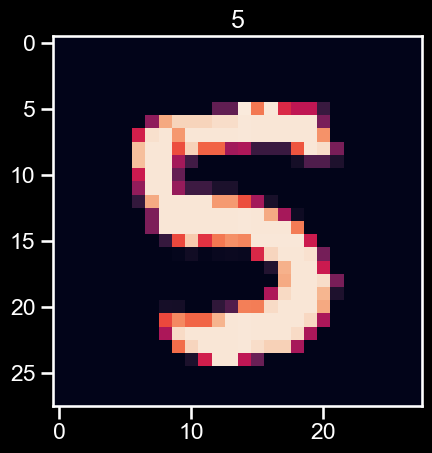

In [28]:
model_test = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(784,)),
    keras.layers.Dropout(0.1),
    keras.layers.Dropout(0.1),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])
model_test.load_weights("mnist-model.h5")
img = X_test[120]
test_img = img.reshape((1,784))
img_class = model_test.predict(test_img)
prediction = np.argmax(img_class)
classname = prediction
print(f'class: {classname}')
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

1/1 [==============================] - 0s 11ms/step
class: 9


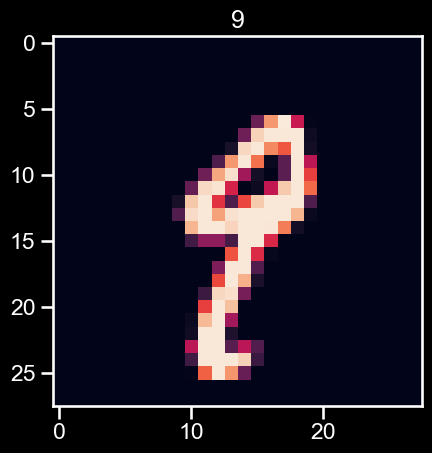

In [29]:
model_test.load_weights("mnist-model.h5")
img = X_test[78]
test_img = img.reshape((1,784))
img_class = model_test.predict(test_img)
prediction = np.argmax(img_class)
classname = prediction
print(f'class: {classname}')
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

model_test.load_weights("mnist-model.h5")
img = image.load_img(path=r'C:\Users\Dell G3\Downloads\phooo.jpg', color_mode='grayscale', target_size=(28,28)) 
img = image.img_to_array(img)
test_img = img.reshape((1,784))
img_class = model_test.predict(test_img)
prediction = np.argmax(img_class)
classname = prediction
print(f'class: {classname}')
img = img.reshape((28,28))
plt.imshow(img);
plt.title(classname)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

model_test.load_weights("mnist-model.h5")
img = image.load_img(path=r'C:\Users\Dell G3\Downloads\im.jpg', color_mode='grayscale', target_size=(28,28)) 
img = image.img_to_array(img)
test_img = img.reshape((1,784))
img_class = model_test.predict(test_img)
prediction = np.argmax(img_class)
classname = prediction
print(f'class: {classname}')
img = img.reshape((28,28))
plt.imshow(img);
plt.title(classname)
plt.show()

# CNN

In [30]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X_train_reshape = X_train.reshape(-1, 28, 28, 1)
X_test_reshape = X_test.reshape(-1, 28, 28, 1)

#Define the model architecture
model_CNN = tf.keras.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(10, activation='softmax')
])

#Compile the model
model_CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Train the model
history_cnn=model_CNN.fit(X_train_reshape, y_train, epochs=10, batch_size=32)

#Evaluate the model on the test data
test_loss, test_acc = model_CNN.evaluate(X_test_reshape, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2957 - accuracy: 0.9511
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0657 - accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0493 - accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0403 - accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0322 - accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0297 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0265 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0232 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0233 - accuracy: 0.9932
Epoch 10/10
313/313 [==============================] - 2s 6ms/step -

In [31]:
# Make predictions on the test set
y_pred_CNN = model_CNN.predict(X_test_reshape)

# Convert the predictions to class labels
y_pred_labels_CNN = np.argmax(y_pred_CNN, axis=1)
# Calculate the precision of the model on the test set
cnn_precision = precision_score(y_test, y_pred_labels_CNN, average=None)

# Print the precision of the model on each class
print("Precision of the model on each class:")
for i in range(10):
    print(f"Class {i}: {cnn_precision[i]}")

313/313 [==============================] - 2s 6ms/step
Precision of the model on each class:
Class 0: 0.9928352098259979
Class 1: 0.9947043248014121
Class 2: 0.9883268482490273
Class 3: 0.9900695134061569
Class 4: 0.9897750511247444
Class 5: 0.9810479375696767
Class 6: 0.9885535900104059
Class 7: 0.9742120343839542
Class 8: 0.997907949790795
Class 9: 0.9803149606299213


In [32]:
# Calculate the recall and F-score of the model on the test set
cnn_recall = recall_score(np.argmax(y_test_cat, axis=1), y_pred_labels_CNN, average=None)
cnn_f1 = f1_score(np.argmax(y_test_cat, axis=1), y_pred_labels_CNN, average=None)

# Print the recall and F-score of the model on each class
print("Recall and F-score of the model on each class:")
for i in range(10):
    print(f"Class {i}: Recall={cnn_recall[i]}, F-score={cnn_f1[i]}")

Recall and F-score of the model on each class:
Class 0: Recall=0.9897959183673469, F-score=0.9913132345426674
Class 1: Recall=0.9929515418502203, F-score=0.9938271604938271
Class 2: Recall=0.9844961240310077, F-score=0.9864077669902912
Class 3: Recall=0.9871287128712871, F-score=0.9885969261279128
Class 4: Recall=0.9857433808553971, F-score=0.9877551020408164
Class 5: Recall=0.9865470852017937, F-score=0.9837898267188373
Class 6: Recall=0.9916492693110647, F-score=0.9900990099009901
Class 7: Recall=0.9922178988326849, F-score=0.983132530120482
Class 8: Recall=0.9794661190965093, F-score=0.9886010362694301
Class 9: Recall=0.9871159563924677, F-score=0.9837037037037037


In [33]:
model_CNN.save("mnist-model-CNN.h5")

In [35]:
from tensorflow.keras.preprocessing import image

model_test2 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model_test2.load_weights("mnist-model-CNN.h5")
img = image.load_img(path=r'C:\Users\Dell G3\Downloads\im.jpg', color_mode='grayscale', target_size=(28,28)) 
img = image.img_to_array(img)
test_img = img.reshape((1,28,28,1))
img_class = model_test2.predict(test_img)
prediction = np.argmax(img_class)
classname = prediction
print(f'class: {classname}')
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

1/1 [==============================] - 0s 42ms/step
class: 9


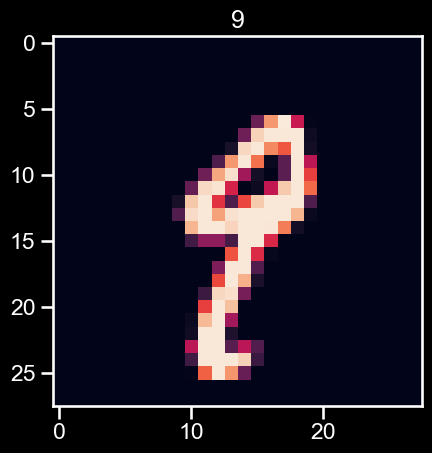

In [36]:
model_test2.load_weights("mnist-model-CNN.h5")
img = X_test[78]
test_img = img.reshape((1,28,28,1))
img_class = model_test2.predict(test_img)
prediction = np.argmax(img_class)
classname = prediction
print(f'class: {classname}')
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

1/1 [==============================] - 0s 12ms/step
class: 6


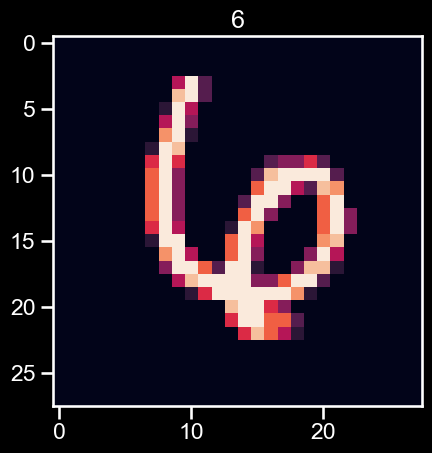

In [37]:
model_test2.load_weights("mnist-model-CNN.h5")
img = X_test[22]
test_img = img.reshape((1,28,28,1))
img_class = model_test2.predict(test_img)
prediction = np.argmax(img_class)
classname = prediction
print(f'class: {classname}')
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

1/1 [==============================] - 0s 12ms/step
class: 4


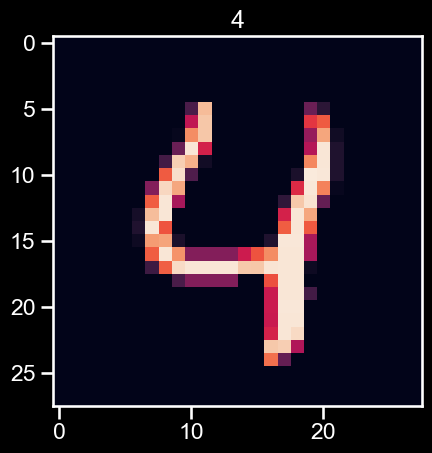

In [38]:
model_test2.load_weights("mnist-model-CNN.h5")
img = X_test[4]
test_img = img.reshape((1,28,28,1))
img_class = model_test2.predict(test_img)
prediction = np.argmax(img_class)
classname = prediction
print(f'class: {classname}')
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

1/1 [==============================] - 0s 12ms/step
class: 5


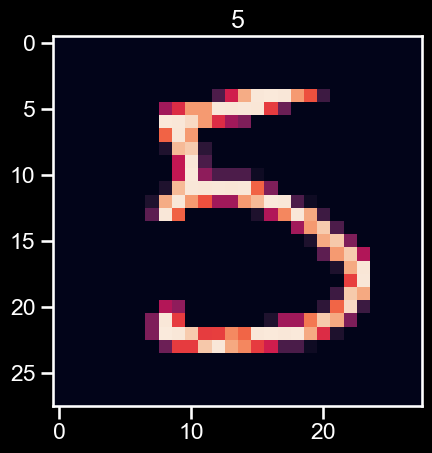

In [39]:
model_test2.load_weights("mnist-model-CNN.h5")
img = X_test[15]
test_img = img.reshape((1,28,28,1))
img_class = model_test2.predict(test_img)
prediction = np.argmax(img_class)
classname = prediction
print(f'class: {classname}')
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

1/1 [==============================] - 0s 13ms/step
class: 4


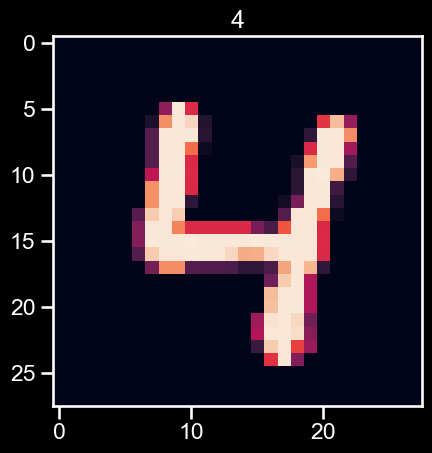

In [40]:
model_test2.load_weights("mnist-model-CNN.h5")
img = X_test[56]
test_img = img.reshape((1,28,28,1))
img_class = model_test2.predict(test_img)
prediction = np.argmax(img_class)
classname = prediction
print(f'class: {classname}')
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

1/1 [==============================] - 0s 12ms/step
class: 1


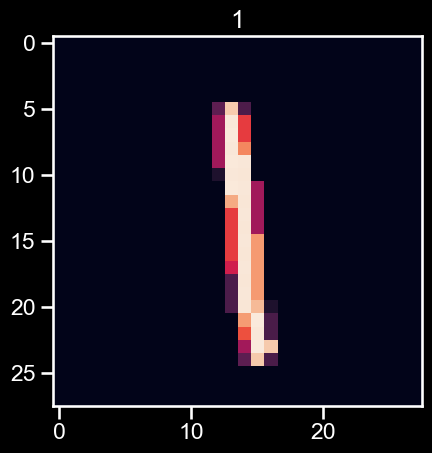

In [41]:
model_test2.load_weights("mnist-model-CNN.h5")
img = X_test[755]
test_img = img.reshape((1,28,28,1))
img_class = model_test2.predict(test_img)
prediction = np.argmax(img_class)
classname = prediction
print(f'class: {classname}')
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

In [43]:
ann_scores = model.evaluate(X_test, y_test, verbose=0)
cnn_scores = model_CNN.evaluate(X_test_reshape, y_test)

print("ANN test accuracy:", ann_scores[1])
print("CNN test accuracy:", cnn_scores[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0672 - accuracy: 0.9878
ANN test accuracy: 0.9265000224113464
CNN test accuracy: 0.9878000020980835


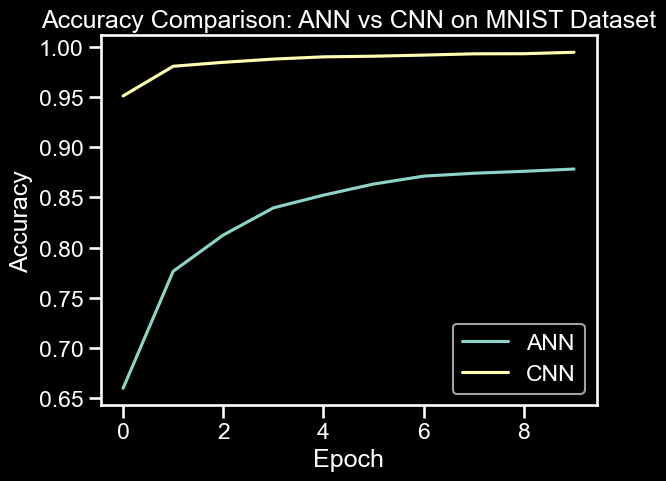

In [44]:
# Plot the accuracy curves for both models
plt.plot(history_ann.history['accuracy'], label='ANN')
plt.plot(history_cnn.history['accuracy'], label='CNN')
plt.title('Accuracy Comparison: ANN vs CNN on MNIST Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

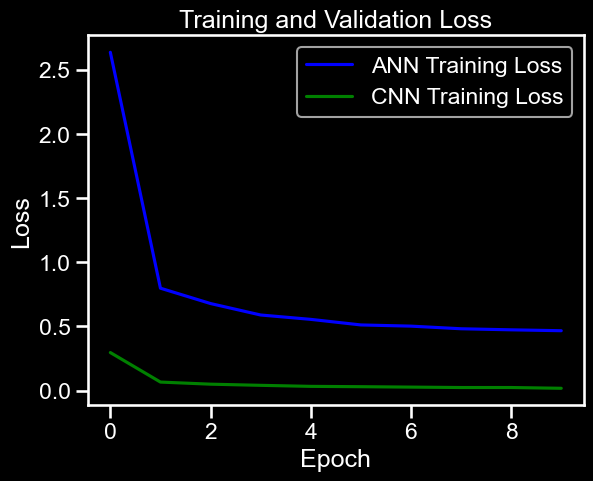

In [45]:
# Plot the loss curves for the ANN and the CNN
plt.plot(history_ann.history['loss'], label='ANN Training Loss', color='blue')
plt.plot(history_cnn.history['loss'], label='CNN Training Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

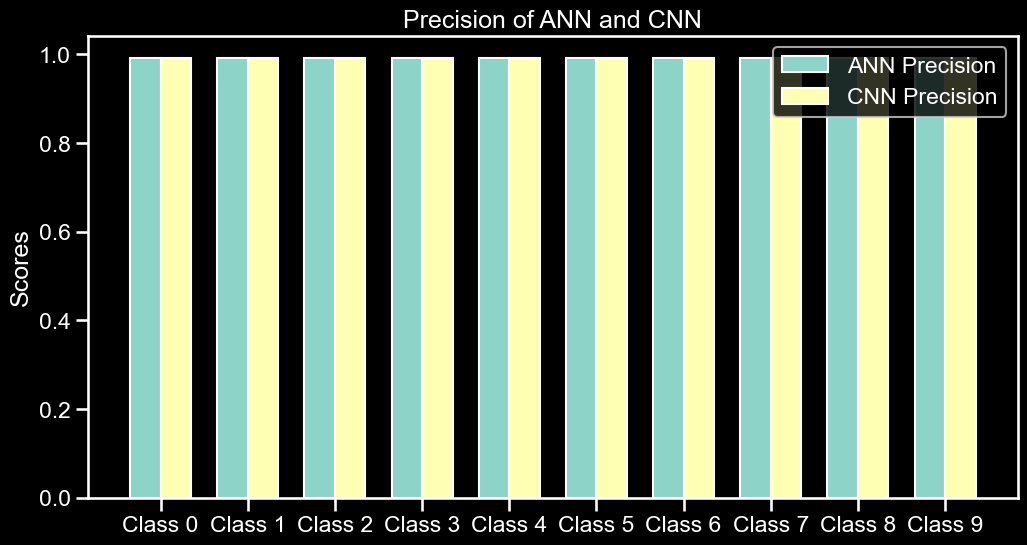

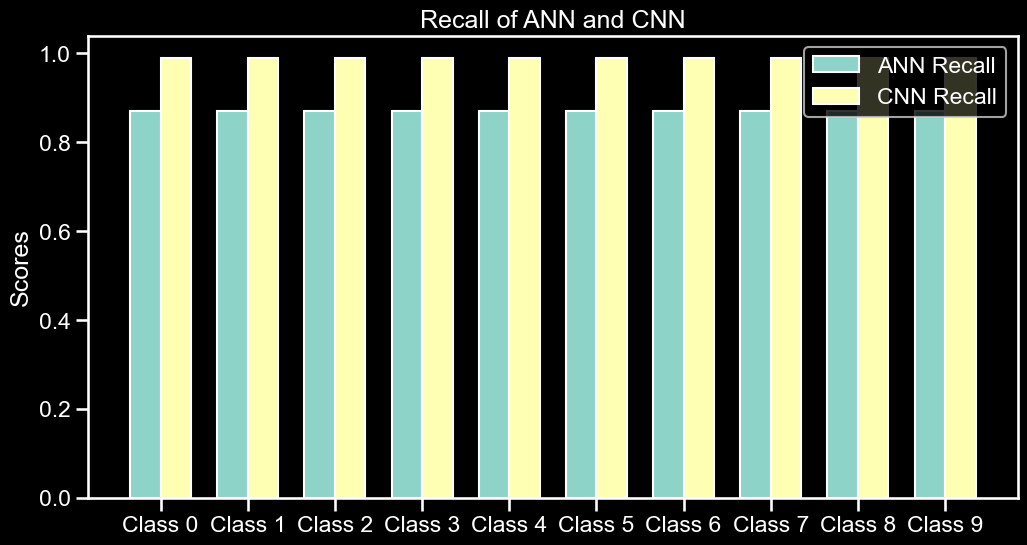

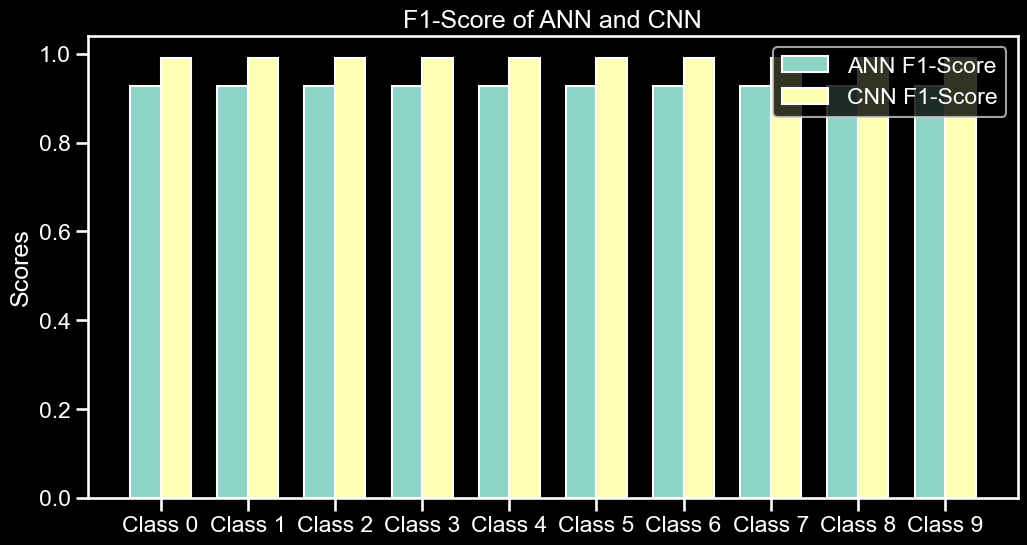

In [46]:
# Create a bar plot for ANN and CNN precision

labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
x = np.arange(len(labels))
width = 0.35

fig1, ax1 = plt.subplots(figsize=(12,6))
rects1 = ax1.bar(x - width/2, ann_precision[0], width, label='ANN Precision')
rects2 = ax1.bar(x + width/2, cnn_precision[0], width, label='CNN Precision')
ax1.set_ylabel('Scores')
ax1.set_title('Precision of ANN and CNN')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()
plt.show()

# Bar plot for ANN recall, CNN recall
fig2, ax2 = plt.subplots(figsize=(12,6))
rects1 = ax2.bar(x - width/2, ann_recall[0], width, label='ANN Recall')
rects2 = ax2.bar(x + width/2, cnn_recall[0], width, label='CNN Recall')
ax2.set_ylabel('Scores')
ax2.set_title('Recall of ANN and CNN')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()
plt.show()

# Bar plot for ANN F1-score, CNN F1-score
fig3, ax3 = plt.subplots(figsize=(12,6))
rects1 = ax3.bar(x - width/2, ann_f1[0], width, label='ANN F1-Score')
rects2 = ax3.bar(x + width/2, cnn_f1[0], width, label='CNN F1-Score')
ax3.set_ylabel('Scores')
ax3.set_title('F1-Score of ANN and CNN')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
ax3.legend()
plt.show()